In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

url = "https://akroncanton.craigslist.org/search/jwa"
response = requests.get(url)
response

<Response [200]>

In [133]:
response.text

'<!DOCTYPE html>\n<html>\n<head>\n    \n\t<meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n\t<meta name="viewport" content="width=device-width,initial-scale=1">\n\t<meta property="og:site_name" content="craigslist">\n\t<meta name="twitter:card" content="preview">\n\t<meta property="og:title" content="akron-canton jewelry - craigslist">\n\t<meta name="description" content="akron-canton jewelry - craigslist">\n\t<meta property="og:description" content="akron-canton jewelry - craigslist">\n\t<meta property="og:url" content="https://akroncanton.craigslist.org/search/jwa">\n\t<meta name="smartbanner:api" content="true">\n\t<meta name="smartbanner:title" content="the craigslist app">\n\t<meta name="smartbanner:author" content="what&#39;s old is new">\n\t<meta name="smartbanner:icon-apple" content="/images/app_icon.png">\n\t<meta name="smartbanner:icon-google" content="/images/app_icon.png">\n\t<meta name="smartbanner:button" content="view">\n\t<meta name="smar

In [134]:
soup = bs(response.text, 'html.parser')

In [135]:
all_posts = soup.find_all('li', class_='result-row')
all_posts

[<li class="result-row" data-pid="7460172937" data-repost-of="7037483916">
 <a class="result-image gallery" data-ids="3:00J0J_fdyPtcLHz2cz_0CI0t2,3:00B0B_fUSsw2vjjGRz_0CI0t2,3:00g0g_ugVjBopXsvz_0t20CI,3:00l0l_4gE2kghOxqAz_0t20CI,3:00808_2uBAPQhKVdWz_0t20CI,3:00G0G_ddyA5vQrS9oz_0t20CI" href="https://akroncanton.craigslist.org/jwl/d/akron-necklaces/7460172937.html">
 <span class="result-price">$18</span>
 </a>
 <div class="result-info">
 <span class="icon icon-star" role="button">
 <span class="screen-reader-text">favorite this post</span>
 </span>
 <time class="result-date" datetime="2022-04-14 16:07" title="Thu 14 Apr 04:07:29 PM">Apr 14</time>
 <h3 class="result-heading">
 <a class="result-title hdrlnk" data-id="7460172937" href="https://akroncanton.craigslist.org/jwl/d/akron-necklaces/7460172937.html" id="postid_7460172937">8 necklaces.</a>
 </h3>
 <span class="result-meta">
 <span class="result-price">$18</span>
 <span class="result-hood"> (Kenmore)</span>
 <span class="result-tags"

In [278]:
#Get posts and store each jewelery item for sale in dictionary

jewelry_results = []
for post in all_posts:
    try:
      
        post_date = post.find('time', class_='result-date').text
        post_price = post.find('span', class_='result-price').contents[0].strip('$').replace(',', '')
        post_hood = post.find('span', class_='result-hood').contents[0].replace("(","").replace(")","").lstrip()
        post_title = post.find('a', class_='result-title hdrlnk').text
        
        
       
        
        post_dict = {'date': post_date,
                      'price':post_price,
                      'hood': post_hood,
                      'title':post_title }
        
        jewelry_results.append(post_dict)
    except AttributeError as e:
        print(e)

'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute 'contents'
'NoneType' object has no attribute

In [279]:
jewelry_results[3:10]

[{'date': 'Apr 14',
  'price': '2',
  'hood': 'Kenmore',
  'title': 'BLING!  2 bracelets.'},
 {'date': 'Apr 14',
  'price': '5',
  'hood': 'Fairlawn',
  'title': 'earring posts w/nuts (9 packs)'},
 {'date': 'Apr 13',
  'price': '0',
  'hood': 'Akron',
  'title': 'Sterling Silver 925 Balinese Apple Pendant'},
 {'date': 'Apr 13',
  'price': '10',
  'hood': 'Rootstown',
  'title': 'Necklace and pierced earring set sets'},
 {'date': 'Apr 13',
  'price': '100',
  'hood': 'Jackson Township',
  'title': "S. Coifman and Guess luxury men's watches"},
 {'date': 'Apr 13',
  'price': '50',
  'hood': 'Stow',
  'title': 'Piercing Supplies Ear Nose Belly Button Needles Jewelry Stainless'},
 {'date': 'Apr 12',
  'price': '30',
  'hood': 'Akron',
  'title': 'Leather Band Ladies Watch'}]

In [286]:
jewelry_df = pd.DataFrame(jewelry_results)

In [287]:
jewelry_df['price']= jewelry_df['price'].astype('float')
# jewelry_df['date'] = jewelry_df['date'].astype('categorical')
filtered_df = jewelry_df[jewelry_df['price'] <= 500].reset_index()

In [288]:
jewelry_df[['month', 'day']] = jewelry_df['date'].str.split(" ", expand=True)
jewelry_df.head()

ValueError: Columns must be same length as key

Text(0.5, 1.0, 'Number of Jewelry Posts per Neighborhood')

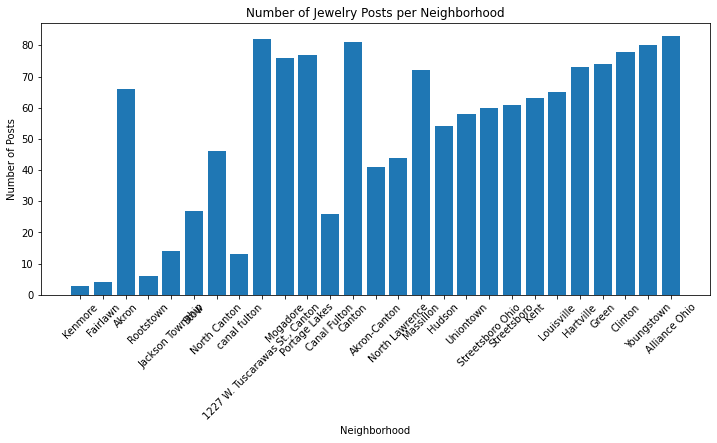

In [289]:
plt.figure(figsize=[12,5])
plt.bar(jewelry_df['hood'],jewelry_df.index)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Posts')
plt.title('Number of Jewelry Posts per Neighborhood')

In [290]:
filtered_df.head()
by_day_df = filtered_df.groupby(['date', 'hood']).sum().reset_index()
by_day_df.head()

date          hood  index  price
0  Apr  1     Massillon    150  170.0
1  Apr  2         Akron     48   50.0
2  Apr  3        Canton     47   55.0
3  Apr  4  North Canton     46   10.0
4  Apr  5         Akron     45   50.0

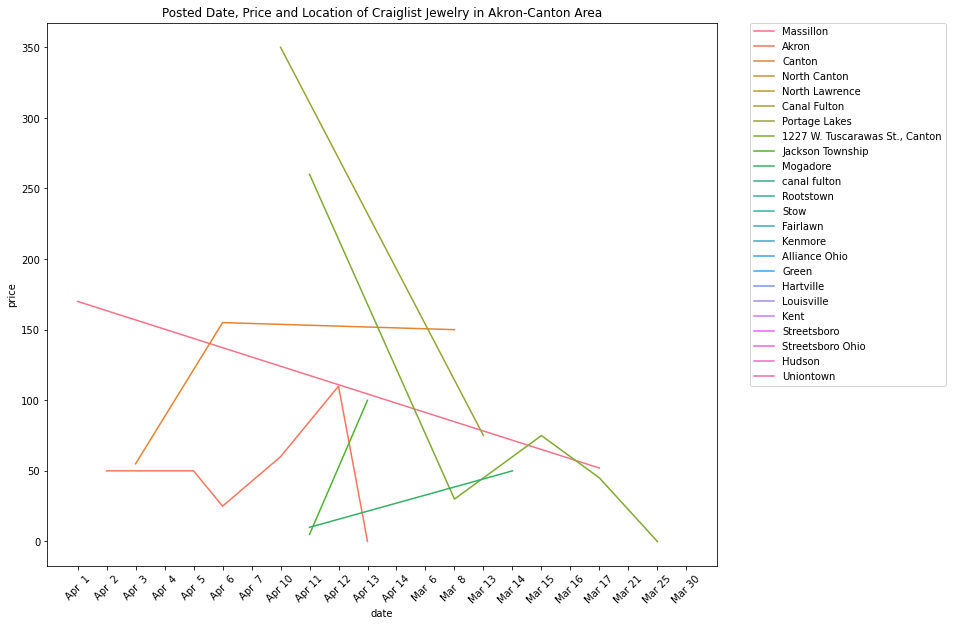

In [291]:
plt.figure(figsize=[12,10])
sns.lineplot(x='date', y='price', data=by_day_df, hue= 'hood')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Posted Date, Price and Location of Craiglist Jewelry in Akron-Canton Area')
plt.show()